- 이전 장들에선 단어 주변의 문맥을 무시했음. 주어진 단어 앞/뒤에 있는 단어들 고려 X.
- ***단어모음 bag-of-words는 그냥 단순히 한 문서의 단어들을 bag에 뒤죽박죽 담아둔 것.***
- 이번엔 무작위 뭉치를 만들지 않고, **한 단어의 이웃 단어 몇 개**만으로 작은 단어 모음을 만들것.
    - 이렇게 하면 단어 벡터 훈련 과정이 문서 전체가 아닌 **서로 연관된 단어들에 집중**하게 됨.


<br>

- **단어 벡터(word vector)**? **단어의 의미(뜻)를 나타내는 수치 벡터.** 
    - 단어의 의미엔 **명시적인 의미** and **함축된(암묵적인) 의미**가 포함.
    - 단어 벡터를 이용해 그 단어가 속한 범주(인물, 장소, 사물 등...)도 잡아낼 수 있음.
    - 용어 빈도에 기초한 이전의 다른 표현들은 *정수로 이뤄진 희소 벡터였음. 정수 희소 벡터 (Integer Sparse Vector)*
    - 단어 벡터는 ***실수 밀집 벡터. (Float Dense Vector)***



# 의미 기반 질의 & 예시

<br>

- 간단한 예시를 보자.
- 어떤 유명인의 이름이 잘 생각나지 않아, 그 사람에 대한 일반적인 인상만으로 웹검색 시도? 마리퀴리 예시.
    > She invented something to do with physics in Europe in the early 20th century.
    
![image.png](attachment:image.png)

(진짜 뜨긴 한다...)

- 단어 벡터를 이용하면 woman, Europe, physics, scientist, famous와 같은 단어들의 의미를 모두 결합한 단어나 이름을 찾을 수 있음.
    - 위 질의문으로부터 Marie Curie라는 토큰에 좀 더 가까이 접근할 수 있음.
- **단어 벡터들이 맞춰져 있다면**, 검색을 위해 해야 할 일은 **결합하고자 하는 단어들의 단어 벡터를 모두 더하면 된다.**

```{.python}
answer_vector = wv['woman'] + wv['Europe'] + wv['physics'] + wv['scientist']
```
- 이런식으로.


## 비유 질문

<br>

- 어떤 인물의 이름을 다른 인물에 빗대어 질문하는 경우도 있음. 예시를 보자.
    > Who is the nuclear physics what Louis Pasteur is to germs?
    > (세균학의 파스퇴르에 비할 만한 핵물리학의 인물은?)
- 단어 벡터에선 Louis Pasteur에서 germs를 빼고 physics를 더하기만 하면 된다.
```{.python}
answer_vector = wv['Louis_Pasteur']  wv['germs'] + wv['physics']
```
- 이런식으로.
- 기억이 날 듯 말 듯한 상황(설단효과) 질문들은 모두 단어벡터로 해결할 수 있음.

# Word Vector with word2vec

<br>

https://wikidocs.net/22660 참고.

- Thomas Mikolov가 적당한 차원의 벡터로 단어의 의미를 부호화 하는 방법을 고안, 어떤 단어가 목표 단어 근처에 출현할 가능성을 예측하도록 모형 훈련.
- 이런 단어 벡터를 생성하는 소프트웨어를 공개, 이것이 바로 Word2Vec.

<br>

- word2vec은 분류명이 붙어있지 않은 문서들로 구성된 큰 말뭉치를 처리하는 것 만으로 단어들의 의미를 학습.
    - 사람이 word2vec 어휘의 단어들에 일일이 라벨링을 할 필요가 없음.
    - 앞 비유에서, word2vec 알고리즘에게 마리 퀴리가 과학자이고, 축구가 스포츠의 한 종류다 라는걸 알려 줄 필요가 없음.
- word2vec은 이런 수많은 내용들을 단순히 텍스트를 읽어서 스스로 학습함.
    - 이때 필요한 것은 오직 마리 퀴리 라는 이름이 과학과 관련된 단어들 근처에 있는 문서들을 word2vec에게 제공하는 것 뿐.
- 일종의 **비지도 학습**. 분류되지 않은 비구조적인 자료가 훨씬 많은 NLP 분야에선 비지도 학습 알고리즘이 제격.


- word2vec에서 신경망 훈련의 목표? 신경망이 **대상 단어의 의미를 직접 배우는 것이 아닌, 문장 안에서 대상 단어 근처의 단어들을 예측하게 만드는 것.**
    - **예측하고자 하는 이웃 단어 == 분류명** 이 되는 셈.
    - 이런 분류명은 사람이 미리 지정해 준 것이 아닌, **모형이 자료 집합 자체에서 가져온 것**. 비지도 학습.
        - ***time series modeling에서도 비지도 학습법이 사용됨.***
        - 주어진 시계열의 일정 구간의 이전 값들에 기초해 그 다음 값들을 예측하도록 훈련됨.
        - 여러 면에서 NLP문제와 많이 비슷. 왜? **어떤 값(단어와 수치)들의 순차열을 다루기 때문.**
- word2vec에서 이런 이웃 단어의 예측 자체가 중요한 것은 아님. 예측은 단지 목적을 위한 한 수단일 뿐.
    - 주의깊게 봐야 하는 것은 **예측을 위해 word2vec이 점진적으로 형성해나가는 벡터들.**
    - 이 표현은 대상 단어의 의미를 chapter 04.의 LSA(잠재 의미 분석)나 LDA(잠재 디리클레 할당)가 산출하는 단어-주제 벡터보다 더 많이 포착함.
    > **자동부호기 (자가부호기, Autoencoder)**를 한번 봐보세요.

<br>

- word2vec은 단어에 연관된 성질들도 학습함.
    - 말뭉치에 있는 임의의 단어가 장소성, 인물성, 개념성 같은 성질과 연관되어 있다면, **다른 모든 단어의 단어벡터에도 그 성질들에 관한 일정한 점수들이 부여됨.**
    - word2vec이 단어 벡터들을 형성(학습)함에 따라, **한 단어의 의미가 이웃 단어들로 번지게 되는 셈.**
    
<br>

- word2vec은 말뭉치의 모든 단어를 chapter 04.에서 논의한 **단어-주제 벡터와 비슷한 수치 벡터로 표현.** 하지만 **word2vec은 주제들이 좀 더 구체적임.**
    - LSA에선 ***단어들이 같은 문서에 있기만 하면 아무리 멀리 떨어져있어도 그 의미들이 번져서 단어-주제 벡터에 반영됐었음.***
    - 하지만 **word2vec은 의미가 번지기 위해선 단어들이 서로 근처에 있어야 함.**
        - 흔히 ***'같은 문장 안에서 다섯 단어 이내로'*** 처럼 조건을 걸어 둠.
        - 또한, word2vec의 단어 벡터는 벡터 연산의 의미가 있음. ***단어 벡터들을 더하고 빼면 원래 벡터들과는 다른 의미의 단어 벡터가 생성됨.***
- 단어 벡터를 **일단의 가중치들 (or 점수들)**이라고 생각할 수 있음. 
- **각 가중치 (or 점수)는 그 단어가 지닌 뜻의 특정 차원('성질')과 연관**됨.
- 예시 코드를 한번 보자.

In [4]:
from nlpia.book.examples.ch06_nessvectors import *
nessvector('Marie_Curie').round(2)

INFO:nlpia.loaders:Downloading word2vec
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.300d\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.27b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.42b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.6b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.bin\.gz$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.tgz$, string=googlenews-vectors-negative300.bin.gz
INFO:nlpia.loaders:expanded+normalized file path: C:\ProgramData\Anaconda3\envs\WorkBase\lib\site-packages\nlpia\bigdata\googlenews-vectors-negative300.bin.gz
INFO:nlpia.loaders:requesting URL: https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vecto

placeness     -0.46
peopleness     0.35
animalness     0.17
conceptness   -0.32
femaleness     0.26
dtype: float64

    패키지 안에서 numpy import 안해서 에러를 낼까..

- 비유 질문 처럼, word2vec 개발자가 원한것은 **벡터 지향적 추론을 가능하게 하는 벡터 표현.**
- 단순히 컴퓨터에 적합한 수치들로 이뤄진 **단어 벡터들에 수학 계산을 적용**해, **얻은 수치들을 다시 사람이 이해할 수 있는 단어들로 환원**하는 것.
    - 단어 벡터들을 더하고 뺌으로서 그 벡터들이 나타내는 단어들에 관한 어떠한 추론을 수행할 수 있다.
    
```{.python}
wv['Timbers'] - wv['Portland'] + wv['Seattle'] = ?, ? = wv['Seattle_Sounders']
```
- 이런 식으로 **벡터를 통해 추론**을 수행하는 것.

## Vector-oriented reasoning (벡터 지향적 추론)

<br>

> 2013' **"Linguistic Regularities in Continuous Space Word Representations"(연속 공간 단어 표현들의 언어학적 규칙성)** 논문을 통해 word2vec이 처음 공개.

<br>

- 단어 벡터가 등장함에 따라, 앞 예시처럼 **주제를 묻는 문제를 벡터 연산으로 풀 수 있게 되었다.**
    
    > Portland Timbers + Seattle - Portland = ?

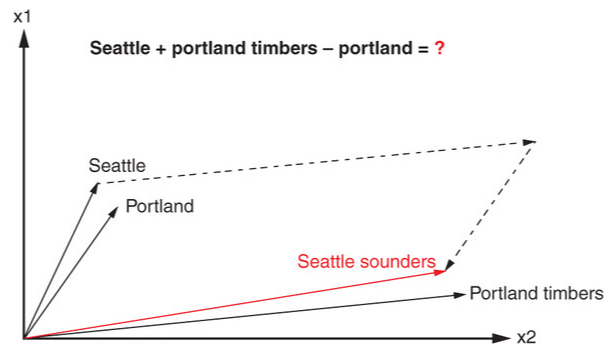

- word2vec 모형은 **단어들 사이 관계에 관한 정보**를 담고 있으며, 여기엔 **유사성에 관한 정보 또한 포함**된다.
    - Portland라는 용어와 Portland Timbers라는 용어가 Seattle과 Seattle Sounders만큼이나 가깝다는 점을 알고있다.
    - 서로 짝을 이룬 이 벡터들은 거리도 가깝고 방향도 거의 같음.
    - Portland 벡터와 Seattle 벡터의 차이를 Portland Timbers 벡터에 더하면 Seattle Sounders 벡터에 가까운 벡터가 나오게 된다.

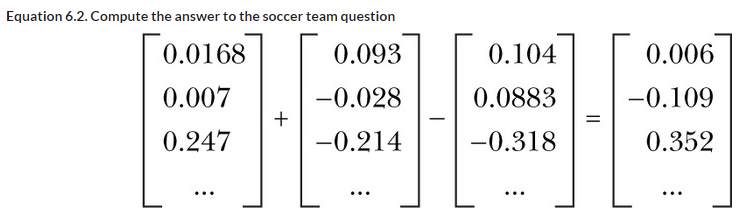

    이런식으로 계산이 이루어 질 것.
    
- **단어 벡터들을 더하고 빼고 나면 어휘의 단어 벡터 중 하나와 거의 같은 벡터가 나옴.**
    - 일반적으로 word2vec 모형의 단어 벡터들은 차원 수가 100 정도.
- 질문을 표현한 **벡터 연산의 결과는 어휘의 어떤 한 단어 벡터와 거의 비슷한 벡터.** 
- **그 벡터 근처에 있는 한 단어**가 바로 **스포츠팀과 도시에 관한 비유 질문 같은 NLP 질문에 대한 자연어 답.**

<br>

- 즉, word2vec을 이용해 **토큰 출현 횟수와 빈도들로 이뤄진 자연어 벡터**들을 그보다 **훨씬 낮은 차원의 벡터 공간으로 변환**할 수 있다.
- 이런 **저차원 공간에서 벡터들에 연산을 적용**해 새로운 벡터를 얻고, 그 벡터를 **다시 자연어 공간으로 변환**함으로써 자연어 추론 문제를 해결할 수 있다.

<br>

- word2vec 연구팀은 ***한 단어의 단수형과 복수형의 벡터 차이가 대부분의 단어에서 비슷하다***는 것을 발견했다.

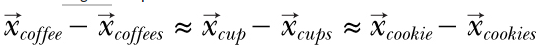

- 이런 유사성은 단수형-복수형에만 한정되지 않았고, 다른 여러 의미 관계에서도 나타났음.
    - 다음과 같은 캘리포니아주의 샌프란시스코에 해당하는 콜로라도주의 도시를 묻는 질문의 답을 단어 벡터 연산으로 구할 수 있음.
    > "San Francisco is to California as what is to Colorado?"  <br>
    > San Francisco - California + Colorado = Denver


### 단어 벡터를 사용해야 하는 이유?

<br>

- 단어 벡터는 자연어 벡터 공간의 형태로 모형화 하고자 하는 다른 모든 대상에 대해서도 유용함.
    - 단어 벡터를 2차원 의미 지도 형태로 시각화 할 수 있음.
    - 이런 case는 지리적 정확도 보단, 단어들의 장소와 단어 사이의 거리에 대한 나름의 느낌을 가지고 단어들을 배치. 의미론적 지도.
- 단어 벡터는 챗봇이나 검색엔진에도 대단히 유용. 패턴이나 키워드 부합의 과도한 깐깐함이나 허약함을 극복하는데 도움을 줌.
    - 예시를 들어보자.
    - 텍사스주 휴스턴시에 사는 사람에 관한 정보를 검색?
    - 근데 하필 그 사람이 댈러스로 이사를 한 후라면, 보통의 검색 엔진은 그 사람에 관한 정보를 찾지 못할 것.
    - 하지만 단어 벡터에 기초한 검색 엔진은 댈러스도 고려해서 검색을 수행할 수 있음.
    
    <br>
    
    - 또다른 예시?
    - 'tell me about a Denver omelette' vs. 'tell me about a Denver Nuggets'
    - 문자 기반 패턴에 의존하는 검색 엔진은 차이를 이해하지 못할 것.
    - 단어 벡터에 기초한 패턴 검색 알고리즘은 전자가 음식 이름, 후자가 프로 농구팀 이름임을 인지하고 알맞은 답을 사용자에게 제시할 수 있음.

## word2vec의 단어 표현 계산

<br>

- word2vec은 주어진 단어를 훈련용 말뭉치의 문맥 안에서의 그 단어의 의미를 말해주는 수치들로 구성된 단어 벡터로 표현.
- 일반적인 방식의 단어 의미 추론 문제를 단어 벡터들에 대한 연산으로 풀 수 있음. 
- 단어 벡터 계산 방법은 크게 2가지로 나뉜다.
    1. **skip-gram** : 주어진 목표 단어의 문맥을 이루는 주변 단어들을 예측. 한 단어가 입력, 주변 단어들이 출력.
    2. **continuous bag-of-words, CBOW** : skip-gram과 반대. 주어진 주변 단어들로부터 하나의 목표 단어를 예측.
- 단어 벡터 표현의 계산은 자원 소비가 심함. But, 대부분의 어플리케이션에 대비해 pre-trained된 단어 벡터 모형들이 이미 마련되어 있음. GloVe나 fastText같은거.

### CBOW (continuous bag-of-words, 연속단어모음)

<br>

- 주어진 주변 단어들에 기초해 중심 단어를 예측하는 방법.
- 훈련 샘플은 다수의 주변 단어들(multihot vector : 주변 단어들의 one-hot vector를 모두 합친 것)과 하나의 중심 단어로 구성.

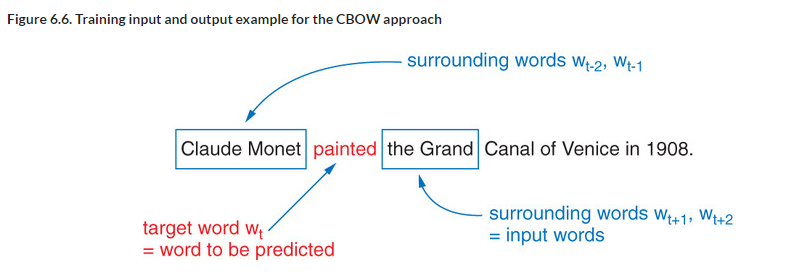

- 문서를 **토큰화**해서 얻은 **주변 단어 멀티핫 벡터**와 **목표 단어 원핫 벡터**의 **쌍들로 이뤄진 훈련 set으로 신경망을 훈련함.**
    - 목표 단어 $w_t$의 원핫 벡터를 신경망의 기대 출력으로 두고, 그 주변단어 $w_{t-2}$, $w_{t-1}$, $w_{t+1}$, $w_{t+2}$의 멀티핫 벡터를 입력으로 두고 신경망 순전파 단계 진행.
    - 출력층 노드는 **softmax 활성화 함수**를 통해 각 단어의 확률 계산, 확률이 가장 높은 단어의 원핫 벡터를 출력.

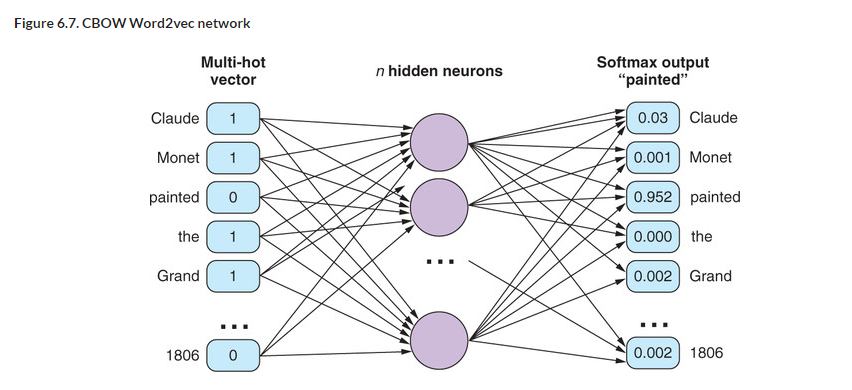

예문 : **"The fat cat sat on the mat"** 을 한번 생각해보자.  https://wikidocs.net/22660

<br>

- CBOW가 하는 일은 **The, fat, cat, on, the, mat (주변단어)** 을 통해 **sat (중심단어)** 을 **예측**하는 것.
- 중심단어 예측을 위해 **앞, 뒤로 몇 개의 단어를 볼 지 결정한 범위**를 **윈도우window** 라고 함. 
    - window 크기가 2이고, 예측하고자 하는 중심 단어가 sat이라고 한다면 앞의 두 단어인 fat-cat, 뒤의 두 단어인 on-the를 참고하는 것.
    - **window 크기가 n**이라고 한다면, 실제 중심 단어를 **예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n**이 될 것.
- window를 크기를 정했다면, 이를 **계속 움직여 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있음**. 이 방법을 **sliding window**라고 함.
    > 아래 그림이 slicing window를 이용해 데이터 셋을 만드는 과정.

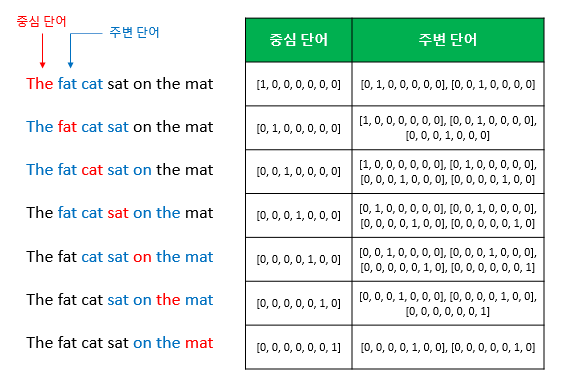

- Word2Vec에서 입력은 모두 one-hot vector여야 함.
- 우측 그림은 중심 단어와 주변 단어를 어떻게 선택했을 때에 따라 각각 어떤 one-hot vector가 생성되는지 보여줌.

<br>

- CBOW의 인공 신경망을 간단히 도식화하면 다음처럼 나타낼 수 있음.

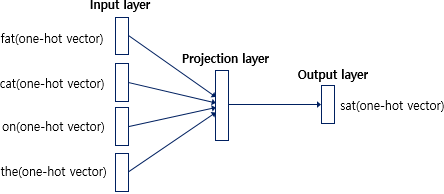

- Word2Vec은 DNN이 아님. 은닉층이 1개. 은닉층엔 활성화 함수도 없음.
- 은닉층이라기 보단 투사층(projection layer)이라 부름. look-up table이라는 연산을 담당.

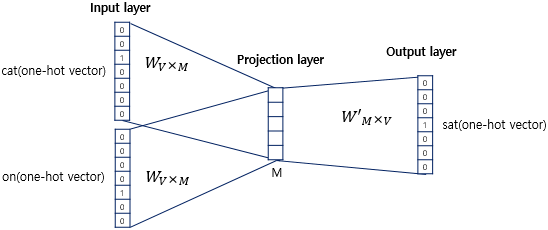 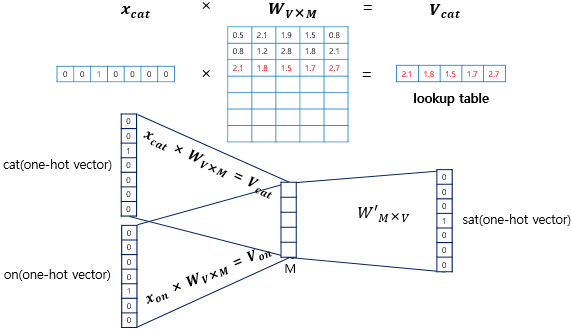

- 신경망을 좀 더 확대해보면 다음과 같은 구조.
- 투사층의 크기가 M. 이는 임베딩하고 난 벡터의 차원.
    - 임베딩 후 벡터의 차원. 위 그림에선 M=5이므로 각 단어의 임베딩 벡터의 차원은 5가 될것.
- 입력층과 투사층 사이 가중치 W는 $V * M$행렬, 투사층에서 출력층 사이의 가중치 W'는 $M * V$행렬. (V는 단어집합 크기)
    - 이 두 행렬은 동일한 행렬을 전치한 것이 아닌, 서로 다른 행렬.
    - CBOW는 W와 W'을 계속해서 학습해가는 구조.

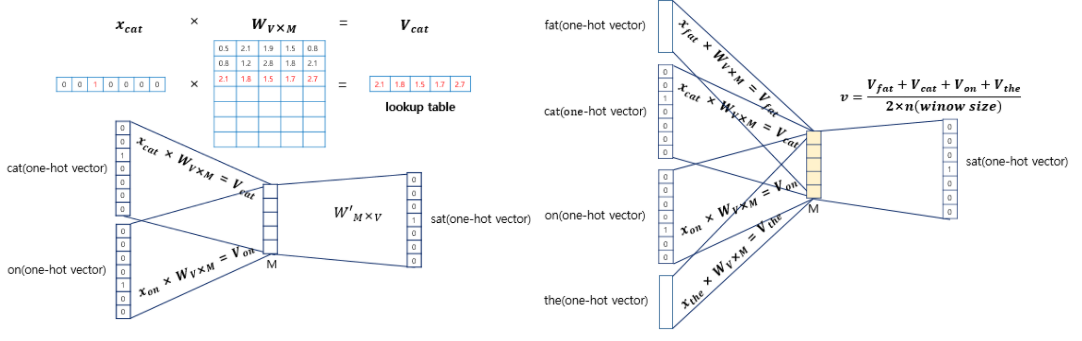

- 각 주변 단어의 one-hot vector x가 가중치 행렬 W와 곱해짐
- 사실상 **W행렬의 i번째 행을 그대로 읽어오는 것**과 동일. lookup table.
    - lookup해온 W의 각 row 벡터가 Word2Vec을 수행한 후의 각 단어의 M차원 크기를 갖는 임베딩 벡터.
- one-hot vector들에 대해 **가중치 W가 곱해져서 생긴 결과 벡터들은 투사층에서 만나 평균치를 계산**하게 됨.
    - skip-gram과는 다르게 투사층에서 벡터의 평균을 구함.
    - skip-gram은 입력이 중심 단어 하나이므로 평균 계산 X.

- 구해진 평균 벡터는 두번째 가중치행렬 W'와 곱연산.
- 결과는 one-hot vector들과 차원이 V로 동일한 벡터.
    - CBOW는 이 벡터에 **softmax함수**를 취함. 이렇게 나온 벡터를 **score vector**라고 함.
    - ***스코어 벡터의 j번째 index가 가진 0~1사이 값은 j번째 단어가 중심 단어일 확률***을 의미.
        - 이 스코어는 **우리가 실제로 값을 알고있는 중심 단어 one-hot vector값에 가까워져야 함.**
    - 두 벡터값의 오차를 줄이기 위해 CBOW는 손실함수를 cross-entropy를 사용.
    - 이 손실함수를 최소화하는 방향으로 역전파 수행, W와 W'을 학습하게 됨.

### Skip-Gram

<br>

- CBOW와는 다르게, **주어진 입력 단어에 기초**해 **일정 범위 이내의 주변 단어들을 예측**하도록 모형을 훈련.
- skip-gram? 중간에 빈자리가 있는 n-gram.  

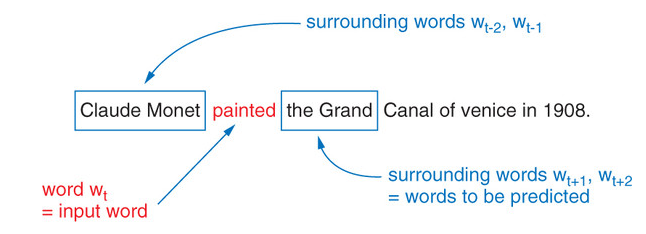

- 마찬가지로 입력층(M개)-은닉층(n개의 뉴런)-출력층(M개) 으로 이뤄진 신경망.
    - n은 단어 하나를 표현하는 벡터의 차원 수.
    - M은 모형의 어휘 크기(단어 개수).
    - 출력층의 활성화 함수는 분류 문제에 쓰이는 softmax 함수.

> skip-gram을 훈련하는 신경망 도식화

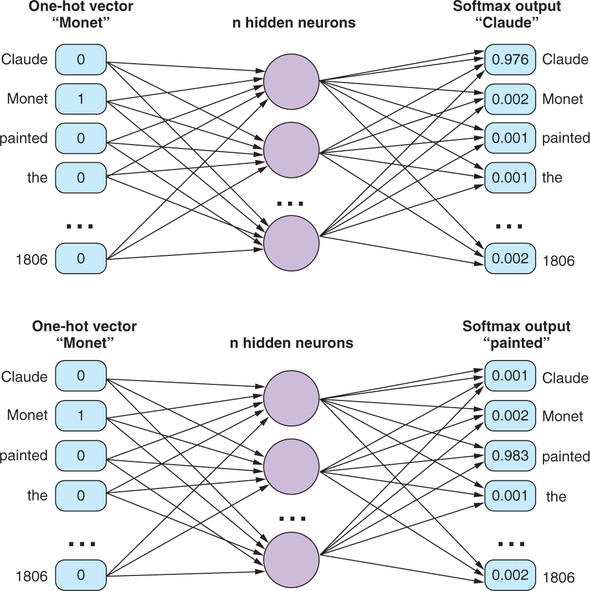

- skip-gram의 구간이 2인 경우엔 목표 단어를 포함한 5-gram으로 문장을 토큰화 해야 함.
- 문장 단어마다 하나의 5-gram이 만들어지므로, 10개의 단어로 이뤄진 문장은 10개의 5-gram으로 토큰화 된다.

> sentence = 'Claude Monet painted the Grand Canal of Venice in 1806.'

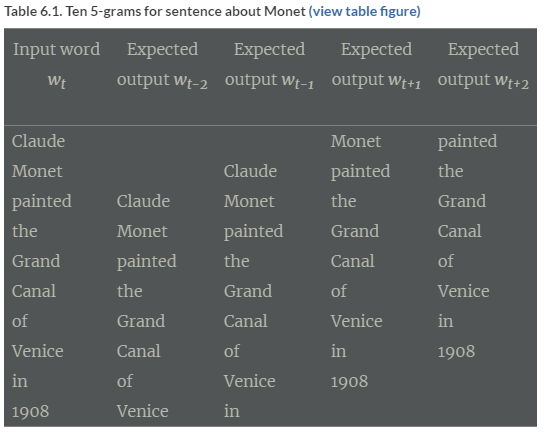

- 이런 입력 단어와 주변 단어들로 이뤄진 훈련 집합을 통해 신경망을 훈련.
    - **입력 단어와 주변 단어들은 one-hot vector 형태**로 입력. 출력 역시 one-hot vector.
    - 출력층의 노드들은 **softmax 함수**를 통해 **각 출력단어가 주어진 입력 단어 주변에 등장할 확률을 계산**.
    - 그 후, **주어진 입력 단어 주변에 등장할 확률이 가증 큰 단어에 해당하는 성분만 1이고 나머지 성분들은 0인 one-hot vector를 출력.**
    - one-hot vector와 손실함수를 계산한 후 역전파 진행, 학습.
- 가중치 행렬의 **각 행은 어휘의 각 단어 주변에 나타날 가능성이 큰 단어들을 의미.**
    - 즉, ***가중치 행렬의 각 행은 각 단어의 의미를 반영***하게 되는 셈.

<br>

- 훈련이 끝나게 되면, 우리에게 필요한건 입력층과 은닉층을 연결하는 가중치들.
- 입력 단어를 표현한 one-hot vector와 이 가중치 행렬을 곱한 것이 바로 단어 벡터 내장(word vector embedding).

- 은닉층의 가중치들은 보통 **행렬**로 표현.
    - **col은 각 입력 뉴런**에 대응, **row는 각 출력 뉴런**에 대응.
- 입력 벡터와 가중치 행렬을곱하게 되면, 은닉층의 출력벡터가 나옴.
- row 벡터 형태의 입력 one-hot vector에 훈련된 가중치 행렬을 곱하면 출력 row 벡터가 생성, 그 벡터의 각 성분은 row 벡터와 col벡터의 내적.
    - 그런데 **입력 벡터는 one-hot vector.** 
    - 곱셈은 결국 **one-hot vector의 1인 성분에 해당하는 행 하나를 가중치 행렬에서 선택**하는 것과 동일.
    - 그 행이 바로 해당 단어의 단어 벡터.
        - 행렬 곱셈 연산 없이, **어휘에서의 단어 번호를 index로 사용**해 **행렬의 한 행을 조회**해서 단어 벡터를 얻을 수 있음.

예문 : **"The fat cat sat on the mat"** 을 생각해보자.

<br>

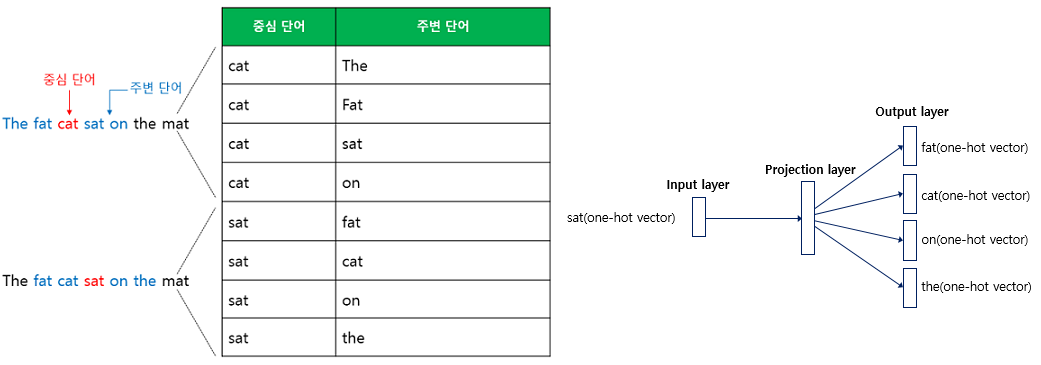

- 중심 단어에 대해 주변 단어를 예측하므로, 투사층에서 벡터들의 평균을 구하는 과정이 없음.
- 여러 논문에서 성능비교를 했을 때, Skip-gram이 CBOW보다 성능이 좋다고 알려저있음.

### Skip-gram vs. CBOW?

<br>

- **말 뭉치가 작을때, 자주 쓰이지 않는 단어들이 주어졌을 땐 Skip-gram**이 잘 작동.
- 신경망 구조 상, **같은 말뭉치라도 Skip-gram 방식이 훈련 샘플을 더 많이 얻을 수 있음**.
- **CBOW는 자주 쓰이는 단어들에 대해 정확도가 높고, 훈련이 빠름**.

<br>

- NNLM (Feed-forward NN Language Model)의 느린 학습속도와 정확도를 개선해 탄생한 것이 Word2Vec.
- NNLM에 있던 은닉층이 사라졌음.
- NNLM보다 빠른 이유? 추가적인 기법(계층적 소프트맥스, 네거티브 샘플링 등..)을 추가로 사용해서.